In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Load the dataset
file_path = '/content/clintox2 1.csv'
data = pd.read_csv(file_path)

# Display class imbalance for FDA_APPROVED and CT_TOX
print("Class distribution in FDA_APPROVED:")
print(data['FDA_APPROVED'].value_counts())
print("Class distribution in CT_TOX:")
print(data['CT_TOX'].value_counts())

# Handling SMILES column (Feature Extraction Placeholder)
# For simplicity, encode SMILES using LabelEncoder (consider more advanced feature extraction for real-world applications)
label_encoder = LabelEncoder()
data['smiles_encoded'] = label_encoder.fit_transform(data['smiles'])

# Define features and targets
X = data[['smiles_encoded']]
y_fda = data['FDA_APPROVED']
y_cttox = data['CT_TOX']

# Handle class imbalance for FDA_APPROVED
class_0_fda = data[data['FDA_APPROVED'] == 0]
class_1_fda = data[data['FDA_APPROVED'] == 1]
if len(class_0_fda) > len(class_1_fda):
    class_1_fda = resample(class_1_fda, replace=True, n_samples=len(class_0_fda), random_state=42)
else:
    class_0_fda = resample(class_0_fda, replace=True, n_samples=len(class_1_fda), random_state=42)

# Handle class imbalance for CT_TOX
class_0_cttox = data[data['CT_TOX'] == 0]
class_1_cttox = data[data['CT_TOX'] == 1]
if len(class_0_cttox) > len(class_1_cttox):
    class_1_cttox = resample(class_1_cttox, replace=True, n_samples=len(class_0_cttox), random_state=42)
else:
    class_0_cttox = resample(class_0_cttox, replace=True, n_samples=len(class_1_cttox), random_state=42)

# Combine resampled data for FDA_APPROVED and CT_TOX
balanced_data_fda = pd.concat([class_0_fda, class_1_fda])
balanced_data_cttox = pd.concat([class_0_cttox, class_1_cttox])

# Split data into training and testing sets for both targets
X_train_fda, X_test_fda, y_train_fda, y_test_fda = train_test_split(
    balanced_data_fda[['smiles_encoded']], balanced_data_fda['FDA_APPROVED'], test_size=0.2, random_state=42)

X_train_cttox, X_test_cttox, y_train_cttox, y_test_cttox = train_test_split(
    balanced_data_cttox[['smiles_encoded']], balanced_data_cttox['CT_TOX'], test_size=0.2, random_state=42)

# Initialize AdaBoost classifiers
ada_boost_fda = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_cttox = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the models
ada_boost_fda.fit(X_train_fda, y_train_fda)
ada_boost_cttox.fit(X_train_cttox, y_train_cttox)

# Make predictions
y_pred_fda = ada_boost_fda.predict(X_test_fda)
y_pred_cttox = ada_boost_cttox.predict(X_test_cttox)

# Evaluate the models
print("FDA_APPROVED Confusion Matrix:")
print(confusion_matrix(y_test_fda, y_pred_fda))
print("FDA_APPROVED Classification Report:")
print(classification_report(y_test_fda, y_pred_fda))

print("CT_TOX Confusion Matrix:")
print(confusion_matrix(y_test_cttox, y_pred_cttox))
print("CT_TOX Classification Report:")
print(classification_report(y_test_cttox, y_pred_cttox))


Class distribution in FDA_APPROVED:
FDA_APPROVED
1    1384
0      80
Name: count, dtype: int64
Class distribution in CT_TOX:
CT_TOX
0    1366
1      98
Name: count, dtype: int64
FDA_APPROVED Confusion Matrix:
[[232  55]
 [ 74 193]]
FDA_APPROVED Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       287
           1       0.78      0.72      0.75       267

    accuracy                           0.77       554
   macro avg       0.77      0.77      0.77       554
weighted avg       0.77      0.77      0.77       554

CT_TOX Confusion Matrix:
[[176 101]
 [ 35 235]]
CT_TOX Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       277
           1       0.70      0.87      0.78       270

    accuracy                           0.75       547
   macro avg       0.77      0.75      0.75       547
weighted avg       0.77      0.75      0.75       547



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Load the dataset
file_path = '/content/clintox2 1.csv'
data = pd.read_csv(file_path)

# Display class imbalance for FDA_APPROVED and CT_TOX
print("Class distribution in FDA_APPROVED:")
print(data['FDA_APPROVED'].value_counts())
print("Class distribution in CT_TOX:")
print(data['CT_TOX'].value_counts())

# Handling SMILES column (Feature Extraction Placeholder)
# For simplicity, encode SMILES using LabelEncoder (consider more advanced feature extraction for real-world applications)
label_encoder = LabelEncoder()
data['smiles_encoded'] = label_encoder.fit_transform(data['smiles'])

# Define features and targets
X = data[['smiles_encoded']]
y_fda = data['FDA_APPROVED']
y_cttox = data['CT_TOX']

# Handle class imbalance for FDA_APPROVED
class_0_fda = data[data['FDA_APPROVED'] == 0]
class_1_fda = data[data['FDA_APPROVED'] == 1]
if len(class_0_fda) > len(class_1_fda):
    class_1_fda = resample(class_1_fda, replace=True, n_samples=len(class_0_fda), random_state=42)
else:
    class_0_fda = resample(class_0_fda, replace=True, n_samples=len(class_1_fda), random_state=42)

# Handle class imbalance for CT_TOX
class_0_cttox = data[data['CT_TOX'] == 0]
class_1_cttox = data[data['CT_TOX'] == 1]
if len(class_0_cttox) > len(class_1_cttox):
    class_1_cttox = resample(class_1_cttox, replace=True, n_samples=len(class_0_cttox), random_state=42)
else:
    class_0_cttox = resample(class_0_cttox, replace=True, n_samples=len(class_1_cttox), random_state=42)

# Combine resampled data for FDA_APPROVED and CT_TOX
balanced_data_fda = pd.concat([class_0_fda, class_1_fda])
balanced_data_cttox = pd.concat([class_0_cttox, class_1_cttox])

# Split data into training and testing sets for both targets
X_train_fda, X_test_fda, y_train_fda, y_test_fda = train_test_split(
    balanced_data_fda[['smiles_encoded']], balanced_data_fda['FDA_APPROVED'], test_size=0.2, random_state=42)

X_train_cttox, X_test_cttox, y_train_cttox, y_test_cttox = train_test_split(
    balanced_data_cttox[['smiles_encoded']], balanced_data_cttox['CT_TOX'], test_size=0.2, random_state=42)

# Initialize AdaBoost classifiers
ada_boost_fda = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_cttox = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the models
ada_boost_fda.fit(X_train_fda, y_train_fda)
ada_boost_cttox.fit(X_train_cttox, y_train_cttox)

# Make predictions
y_pred_fda = ada_boost_fda.predict(X_test_fda)
y_pred_cttox = ada_boost_cttox.predict(X_test_cttox)

# Evaluate the models for FDA_APPROVED
print("FDA_APPROVED Confusion Matrix:")
conf_matrix_fda = confusion_matrix(y_test_fda, y_pred_fda)
print(conf_matrix_fda)
print("FDA_APPROVED Classification Report:")
print(classification_report(y_test_fda, y_pred_fda))

# Evaluate the models for CT_TOX
print("CT_TOX Confusion Matrix:")
conf_matrix_cttox = confusion_matrix(y_test_cttox, y_pred_cttox)
print(conf_matrix_cttox)
print("CT_TOX Classification Report:")
print(classification_report(y_test_cttox, y_pred_cttox))


Class distribution in FDA_APPROVED:
FDA_APPROVED
1    1384
0      80
Name: count, dtype: int64
Class distribution in CT_TOX:
CT_TOX
0    1366
1      98
Name: count, dtype: int64
FDA_APPROVED Confusion Matrix:
[[232  55]
 [ 74 193]]
FDA_APPROVED Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       287
           1       0.78      0.72      0.75       267

    accuracy                           0.77       554
   macro avg       0.77      0.77      0.77       554
weighted avg       0.77      0.77      0.77       554

CT_TOX Confusion Matrix:
[[176 101]
 [ 35 235]]
CT_TOX Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       277
           1       0.70      0.87      0.78       270

    accuracy                           0.75       547
   macro avg       0.77      0.75      0.75       547
weighted avg       0.77      0.75      0.75       547



Class distribution in FDA_APPROVED:
FDA_APPROVED
1    1384
0      80
Name: count, dtype: int64
Class distribution in CT_TOX:
CT_TOX
0    1366
1      98
Name: count, dtype: int64
FDA_APPROVED Confusion Matrix:
[[232  55]
 [ 74 193]]
FDA_APPROVED Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       287
           1       0.78      0.72      0.75       267

    accuracy                           0.77       554
   macro avg       0.77      0.77      0.77       554
weighted avg       0.77      0.77      0.77       554

CT_TOX Confusion Matrix:
[[176 101]
 [ 35 235]]
CT_TOX Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       277
           1       0.70      0.87      0.78       270

    accuracy                           0.75       547
   macro avg       0.77      0.75      0.75       547
weighted avg       0.77      0.75      0.75       547



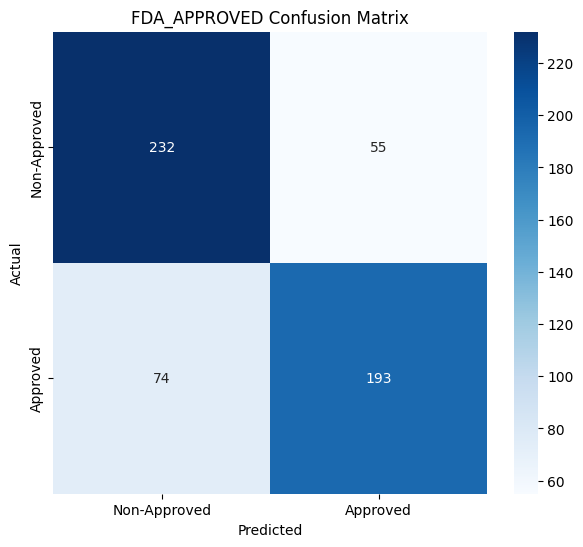

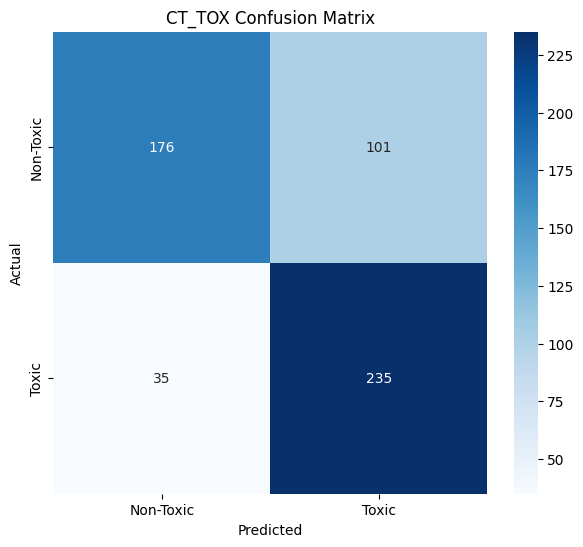

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/clintox2 1.csv'
data = pd.read_csv(file_path)

# Display class imbalance for FDA_APPROVED and CT_TOX
print("Class distribution in FDA_APPROVED:")
print(data['FDA_APPROVED'].value_counts())
print("Class distribution in CT_TOX:")
print(data['CT_TOX'].value_counts())

# Handling SMILES column (Feature Extraction Placeholder)
# For simplicity, encode SMILES using LabelEncoder (consider more advanced feature extraction for real-world applications)
label_encoder = LabelEncoder()
data['smiles_encoded'] = label_encoder.fit_transform(data['smiles'])

# Define features and targets
X = data[['smiles_encoded']]
y_fda = data['FDA_APPROVED']
y_cttox = data['CT_TOX']

# Handle class imbalance for FDA_APPROVED
class_0_fda = data[data['FDA_APPROVED'] == 0]
class_1_fda = data[data['FDA_APPROVED'] == 1]
if len(class_0_fda) > len(class_1_fda):
    class_1_fda = resample(class_1_fda, replace=True, n_samples=len(class_0_fda), random_state=42)
else:
    class_0_fda = resample(class_0_fda, replace=True, n_samples=len(class_1_fda), random_state=42)

# Handle class imbalance for CT_TOX
class_0_cttox = data[data['CT_TOX'] == 0]
class_1_cttox = data[data['CT_TOX'] == 1]
if len(class_0_cttox) > len(class_1_cttox):
    class_1_cttox = resample(class_1_cttox, replace=True, n_samples=len(class_0_cttox), random_state=42)
else:
    class_0_cttox = resample(class_0_cttox, replace=True, n_samples=len(class_1_cttox), random_state=42)

# Combine resampled data for FDA_APPROVED and CT_TOX
balanced_data_fda = pd.concat([class_0_fda, class_1_fda])
balanced_data_cttox = pd.concat([class_0_cttox, class_1_cttox])

# Split data into training and testing sets for both targets
X_train_fda, X_test_fda, y_train_fda, y_test_fda = train_test_split(
    balanced_data_fda[['smiles_encoded']], balanced_data_fda['FDA_APPROVED'], test_size=0.2, random_state=42)

X_train_cttox, X_test_cttox, y_train_cttox, y_test_cttox = train_test_split(
    balanced_data_cttox[['smiles_encoded']], balanced_data_cttox['CT_TOX'], test_size=0.2, random_state=42)

# Initialize AdaBoost classifiers
ada_boost_fda = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_cttox = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the models
ada_boost_fda.fit(X_train_fda, y_train_fda)
ada_boost_cttox.fit(X_train_cttox, y_train_cttox)

# Make predictions
y_pred_fda = ada_boost_fda.predict(X_test_fda)
y_pred_cttox = ada_boost_cttox.predict(X_test_cttox)

# Evaluate the models for FDA_APPROVED
print("FDA_APPROVED Confusion Matrix:")
conf_matrix_fda = confusion_matrix(y_test_fda, y_pred_fda)
print(conf_matrix_fda)
print("FDA_APPROVED Classification Report:")
print(classification_report(y_test_fda, y_pred_fda))

# Evaluate the models for CT_TOX
print("CT_TOX Confusion Matrix:")
conf_matrix_cttox = confusion_matrix(y_test_cttox, y_pred_cttox)
print(conf_matrix_cttox)
print("CT_TOX Classification Report:")
print(classification_report(y_test_cttox, y_pred_cttox))

# Plot heatmap for FDA_APPROVED confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_fda, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Approved', 'Approved'], yticklabels=['Non-Approved', 'Approved'])
plt.title('FDA_APPROVED Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot heatmap for CT_TOX confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_cttox, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('CT_TOX Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
